# Team Project 3 - Solving a System of Linear Equations
## Chris Hayduk

In this project, we compare the performance of three different methods of solving a system of linear equations. 

#### 1. (10 pts) Create a function randmat(n) which returns a random square matrix constructed as the following recipe. 
<ul>
    <li>The size of the matrix is $n \times n$.</li>
    <li>Each off-diagonal entry ($a_{ij}$ where $i \ne j$) is a random number in $[0, 1)$. A random number can be constructed by the random method (see <a href="https://docs.scipy.org/doc/numpy/reference/routines.random.html">here</a>.</li>
    <li>A diagonal entry $a_{ii}$ is a random number in $[n, n+1)$. (This condition may look like artificial, but we will discuss the reason during the class.)</li>
</ul>

#### And create a function randvec(n) which returns an $n$-dimensional random vector whose entries are random numbers in $[0, 100)$. 

In [35]:
import numpy as np

#Define randmat function
def randmat(n):
    #Initialize matrix
    mat = [[-999 for i in range(n)] for j in range(n)]
    
    #Loop through rows of matrix
    for i in range(n):
        #Loop through columns of matrix
        for j in range(n):
            #Generate random numbers
            rand_num = np.random.random_sample()
            #Add n to random number if i == j and assign it to mat[i][j]
            if i == j:
                mat[i][j] = rand_num+n
            #If i != j, just assign random number to mat[i][j]
            else:
                mat[i][j] = rand_num
    
    #Return mat
    return mat

#Define function to print matrices in an easier to read manner
def print_mat(mat):
    for i in range(len(mat)):
        if i != len(mat)-1:
            print(mat[i], ',')
        else:
            print(mat[i])

#Test run for randmat function
mat = randmat(5)

print("Test matrix:")
print_mat(mat)

#Define randvec function
def randvec(n):  
    #Generate vector of random numbers
    vec = np.random.uniform(0,100,n)
    
    #Return vector
    return vec

#Test run for randvec function
vec = randvec(5)

print("\nTest vector:")
print(vec)

Test matrix:
[5.929635216007024, 0.07047727078923671, 0.42464298520706556, 0.8814738899016566, 0.47486076771121366] ,
[0.2494785060063327, 5.889340500103989, 0.8046987363808465, 0.19389247142945965, 0.3939014572010635] ,
[0.5213908661684048, 0.7323515653202772, 5.8016513501249625, 0.6965849427652941, 0.2853048856167968] ,
[0.53941665437571, 0.5463186579656526, 0.806126886848234, 5.850673079817485, 0.04828293204939149] ,
[0.9913771191422192, 0.826880234785505, 0.2511655159283428, 0.301937706716948, 5.666310462085641]

Test vector:
[14.24030329 72.00298577 12.79485582 53.37351188 55.26216355]


#### 2. (10 pts) Create a function GaussElim(A, b) which solves a system of linear equations $Ax = b$ by using Gaussian Elimination without pivoting. DO NOT use solve method in the linear algebra package! You have to make a code for it. 

In [36]:
#Define GaussElim function
def GaussElim(A, b):
    #Initialize augmented matrix
    mat = [[-999 for i in range(len(A[0])+1)] for j in range(len(A))]
    
    #Assign values to augmented matrix
    for i in range(len(A)):
        for j in range(len(A[0])+1):
            if j != len(A[0]):
                mat[i][j] = A[i][j]
            else:
                mat[i][j] = b[i]
    
    #Start at column 0
    col = 0
    
    #Loop through rows
    for i in range(len(mat)):
        row = i+1
        
        #Apply multipliers to each row below the current row (row i)
        #Do this until we reach the last row of the matrix
        while row < len(mat):
            m = mat[row][col]/mat[i][col]
            
            #Initialize temporary row to store new values
            tempRow = []
            
            #Derive new values by using multiplier and row operations
            for j in range(len(mat[0])):
                tempRow.append(mat[row][j] - m*mat[i][j])
            
            #Set the target row equal to tempRow
            mat[row] = tempRow
            
            #Move on to the next row
            row = row + 1
        
        #Move on to the next column
        col = col+1
    
    #Initialize x vector
    x = [0.0 for i in range(len(mat))]
    
    #Define column that contains the b vector
    bcol = len(mat[0])-1
    
    #Initialize last value of the x vector
    x[len(x)-1] =  mat[len(mat)-1][bcol]/mat[len(mat)-1][bcol-1]
    
    #Loop backwards from the second to last row in the matrix to the first row in the matrix
    for i in range(len(mat)-2, -1, -1):
        #Set x[i] equal to corresponding value in b column
        x[i] = mat[i][bcol]
        
        #Loop through colums
        #Subtract each known x value * its coefficient
        for j in range(i+1, len(mat)):
            x[i] -= mat[i][j]*x[j]
        
        #Divide x value by the its coefficient
        x[i] = x[i]/mat[i][i]
    
    return(x)

#Example run
#Target answer is [-2.0, 3.0, 1.0]
A = [[-3, 2, -6],
    [5, 7, -5],
    [1, 4, -2]]

b = [6, 6, 8]

print(GaussElim(A, b), '\n')

#Target answer is about [7.111, -3.222]
A = [[2.0,1.0],
     [5.0,7.0]]

b = [11.0,13.0]

print(GaussElim(A, b))

[-2.0, 3.0, 1.0] 

[7.111111111111111, -3.2222222222222223]


#### 3. (10 pts) Create a function Jacobi(A, b, err) which solves a system of linear equations $Ax = b$ by using Jacobi interation method. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [37]:
#Function to compute norm of vector
def norm(x):
    abs_x = np.absolute(x)

    max_num = np.amax(abs_x)

    return(max_num)

#Function to compute spectral radius of matrix
def spectral_radius(x):
    eig_vals = np.linalg.eigvals(x)
    
    eig_vals = np.absolute(eig_vals)
    
    return(np.amax(eig_vals))

def Jacobi(A, b, err):  
    A = np.array(A)
    b = np.array(b)
    
    #Get diagonal of A
    diagA = np.diagonal(A)
    
    #Get matrix with diagonal of A and all other entries = 0
    D = np.diagflat(diagA)
    
    #R = A with all diagonal entries equal to 0
    R = A - D
    
    iteration_mat = np.dot(np.linalg.inv(D), R)
    spec_rad = spectral_radius(iteration_mat)
    
    #Output warning if spectral radius is greater than 1
    if(spec_rad > 1):
        print("Spectral radius is greater than 1, Jacobi iteration may not converge!")
        
    x0 = np.ones(len(b))
        
    relerr = 1000
    while relerr > err:
        x = (b - np.dot(R, x0))/diagA

        relerr = norm(x-x0)/(norm(x) + np.finfo(float).eps)
        
        x0 = x
    
    return(x0)
    
#Example run
#Target answer is [-2.0, 3.0, 1.0]
A = [[-3, 2, -6],
    [5, 7, -5],
    [1, 4, -2]]

b = [6, 6, 8]

print(Jacobi(A, b, 10**(-6)), '\n')

#Target answer is about [7.111, -3.222]
A = [[2.0,1.0],
     [5.0,7.0]]

b = [11.0,13.0]

print(Jacobi(A, b, 10**(-6)))

Spectral radius is greater than 1, Jacobi iteration may not converge!
[             inf              inf -1.15407429e+307] 

[ 7.11110786 -3.22221551]


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


#### 4. (10 pts) Create a function GaussSeidel(A, b, err) which solves a system of linear equations $Ax = b$ by using Gauss-Seidel interation method. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [38]:
#Function to check if the matrix is positive definite
def check_positive_definite(x):
    eig_vals = np.linalg.eigvals(x)
    
    positive_definite = True
    
    for eig_val in eig_vals:
        if eig_val < 0:
            positive_definite = False
            
    return positive_definite

#Function to check if the matrix is diagonally dominant
def check_diagonal_dominance(x):
    D = np.diag(np.abs(x)) # Find diagonal coefficients
    S = np.sum(np.abs(x), axis=1) - D # Find row sum without diagonal
    
    diagonal_dominant = True
    
    if np.all(D <= S):
        diagonal_dominant = False
    
    return diagonal_dominant

def GaussSeidel(A, b, err):
    n = len(A)
    
    A = np.array(A)
    b = np.array(b)
    
    #Output warning if matrix is not positive definite and not diagonally dominant
    if(not (check_positive_definite(A)) and not (check_diagonal_dominance(A))):
        print("The matrix is not positive definite and is not diagonally dominant. Gauss-Seidel may not converge!")
            
    x0 = np.zeros(len(b))
    
    relerr = 1000
    
    while relerr > err:
        x = np.zeros(len(b))
        
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x0[i + 1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]
        
        relerr = norm(x-x0)/(norm(x) + np.finfo(float).eps)
        
        x0 = x
    
    return(x0)

#Example run
#Target answer is [-2.0, 3.0, 1.0]
A = [[-3, 2, -6],
    [5, 7, -5],
    [1, 4, -2]]

b = [6, 6, 8]

print(GaussSeidel(A, b, 10**(-6)), '\n')

#Target answer is about [7.111, -3.222]
A = [[2.0,1.0],
     [5.0,7.0]]

b = [11.0,13.0]

print(GaussSeidel(A, b, 10**(-6)))

The matrix is not positive definite and is not diagonally dominant. Gauss-Seidel may not converge!
[3.22327499e+307            -inf            -inf] 

[ 7.11110863 -3.22222045]


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


#### 5. (10 pts) For $n = 100, 200, 300, \cdots , 1000$, create a random $n \times n$ matrix $A$ and a random $n$-dimensional vector $b$. Solve the system of linear equations $Ax = b$ by using GaussElim(A, b), Jacobi(A, b, err), and GaussSeidel(A, b, err). Use $10^{-6}$ for the error tolerance. Record the excution time for each method. Plot the graph of the excution time for those three methods on the same plane.

For the computation of the excution time, you may use the following method:

In [39]:
import time

iterations = [100*i for i in range(1, 11)]
err = 10**(-6)

gauss_elim_execution = []
jacobi_execution = []
gauss_seidel_execution = []

for n in iterations:
    print("Trial with n = {}".format(n))
    A = randmat(n)
    b = randvec(n)
    
    start = time.time()
    GaussElim(A, b)
    end = time.time()

    print("\tGaussian Elimination: {} seconds".format(end - start))
    
    gauss_elim_execution.append(end-start)
    
    start = time.time()
    Jacobi(A, b, err)
    end = time.time()

    print("\tJacobi Iteration: {} seconds".format(end - start))
    
    jacobi_execution.append(end-start)
    
    start = time.time()
    GaussSeidel(A, b, err)
    end = time.time()

    print("\tGauss-Seidel: {} seconds".format(end - start))
    print("\n")
    
    gauss_seidel_execution.append(end-start)

Trial with n = 100
	Gaussian Elimination: 0.12492609024047852 seconds
	Jacobi Iteration: 0.03297591209411621 seconds
	Gauss-Seidel: 0.008994579315185547 seconds


Trial with n = 200
	Gaussian Elimination: 0.9494097232818604 seconds
	Jacobi Iteration: 0.04483509063720703 seconds
	Gauss-Seidel: 0.024128437042236328 seconds


Trial with n = 300
	Gaussian Elimination: 3.2936713695526123 seconds
	Jacobi Iteration: 0.06026816368103027 seconds
	Gauss-Seidel: 0.06488990783691406 seconds


Trial with n = 400
	Gaussian Elimination: 7.863976716995239 seconds
	Jacobi Iteration: 0.09801864624023438 seconds
	Gauss-Seidel: 0.12210774421691895 seconds


Trial with n = 500
	Gaussian Elimination: 15.306518793106079 seconds
	Jacobi Iteration: 0.16776061058044434 seconds
	Gauss-Seidel: 0.168562650680542 seconds


Trial with n = 600
	Gaussian Elimination: 28.57206153869629 seconds
	Jacobi Iteration: 0.5356700420379639 seconds
	Gauss-Seidel: 0.4397294521331787 seconds


Trial with n = 700
	Gaussian Eliminat

<IPython.core.display.Javascript object>


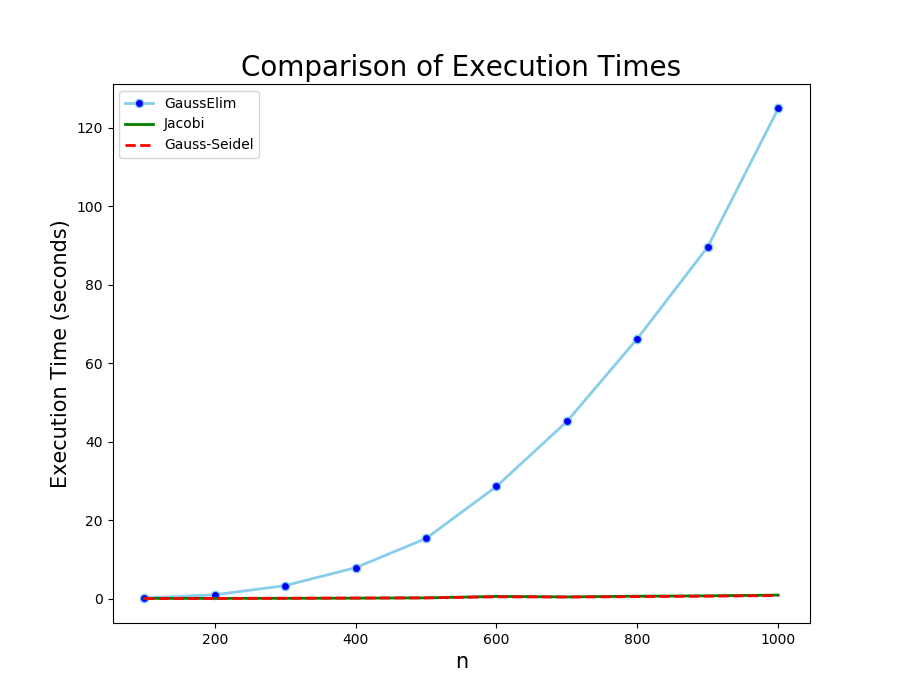

In [59]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame({'n': iterations, 'GaussElim': gauss_elim_execution, 
                 'Jacobi': jacobi_execution, 
                 'Gauss-Seidel': gauss_seidel_execution})

plt.plot( 'n', 'GaussElim', data=df, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=2)
plt.plot( 'n', 'Jacobi', data=df, marker='', color='green', linewidth=2)
plt.plot( 'n', 'Gauss-Seidel', data=df, marker='', color='red', linewidth=2, linestyle='dashed')
plt.legend(loc='upper left', fontsize = 15)
plt.title("Comparison of Execution Times", fontsize = 20)
plt.ylabel("Execution Time (seconds)", fontsize = 15)
plt.xlabel("n", fontsize = 15)
plt.rcParams["figure.figsize"] = [9,7]
plt.legend()

Well, if you are interested in, then you can make a code using the "theoretically simplest method". For $Ax = b$, $x = A^{-1}b$. By using Gauss Elimination, you may compute $A^{-1}$ and then compute $A^{-1}b$. Recall that one can compute $A^{-1}$ as the following:
<ul>
    <li>Make an augmented matrix $[A | I]$ where $I$ is the $n \times n$ identity matrix.</li>
    <li>Apply elementary row operations until the left half $A$ on $[A| I]$ becomes $I$.</li>
    <li>Then the right half of the augmented matrix is $A^{-1}$.</li>
</ul>
Compare the performance of this method with above three methods.

In [41]:
def GaussElimInverse(A, b):
    A = np.array(A)
    b = np.array(b)
    
    identity = np.identity(len(A))
    
    mat = np.concatenate((A, identity), axis = 1)
               
    #Start at column 0
    col = 0
    
    #Loop through rows
    for i in range(len(mat)):
        #Set entry in row i, column col to 1
        row = 0
        
        tempRow = []
        
        m = 1.0/mat[i][col]
        
        for j in range(len(mat[0])):
            tempRow.append(m*mat[i][j])
        
        mat[i] = tempRow
        
        #Apply multipliers to each row other than the current row (row i)
        #Do this until we reach the last row of the matrix
        while row < len(mat):                
            m = mat[row][col]/mat[i][col]
            
            #Initialize temporary row to store new values
            tempRow = []
            
            if row != i:
                #Derive new values by using multiplier and row operations
                for j in range(len(mat[0])):
                    tempRow.append(mat[row][j] - m*mat[i][j])
                    
                #Set the target row equal to tempRow
                mat[row] = tempRow
            
            #Move on to the next row
            row = row + 1
        
        #Move on to the next column
        col = col+1
    
    #Split matrix so that we can obtain A inverse
    A_inverse = np.hsplit(mat, 2)
    A_inverse = A_inverse[1]
    
    #Multiply A inverse and b to obtain the solution vector x
    x = np.dot(A_inverse, b)
    
    return(x)

#Example run
#Target answer is [-2.0, 3.0, 1.0]
A = [[-3, 2, -6],
    [5, 7, -5],
    [1, 4, -2]]

b = [6, 6, 8]

print(GaussElimInverse(A, b))

[-2.  3.  1.]


Let's compare this method to the previous three methods now:

In [45]:
gauss_elim_inverse_execution = []

for n in iterations:
    print("Trial with n = {}".format(n))
    A = randmat(n)
    b = randvec(n)
    
    start = time.time()
    GaussElim(A, b)
    end = time.time()

    print("\tGaussian Elimination Inverse: {} seconds".format(end - start))
    
    gauss_elim_inverse_execution.append(end-start)

Trial with n = 100
	Gaussian Elimination Inverse: 0.12092256546020508 seconds
Trial with n = 200
	Gaussian Elimination Inverse: 0.9594123363494873 seconds
Trial with n = 300
	Gaussian Elimination Inverse: 3.2959654331207275 seconds
Trial with n = 400
	Gaussian Elimination Inverse: 7.883139610290527 seconds
Trial with n = 500
	Gaussian Elimination Inverse: 15.433489561080933 seconds
Trial with n = 600
	Gaussian Elimination Inverse: 27.95676016807556 seconds
Trial with n = 700
	Gaussian Elimination Inverse: 43.75877380371094 seconds
Trial with n = 800
	Gaussian Elimination Inverse: 64.02952766418457 seconds
Trial with n = 900
	Gaussian Elimination Inverse: 90.25236082077026 seconds
Trial with n = 1000
	Gaussian Elimination Inverse: 124.49724912643433 seconds


<IPython.core.display.Javascript object>


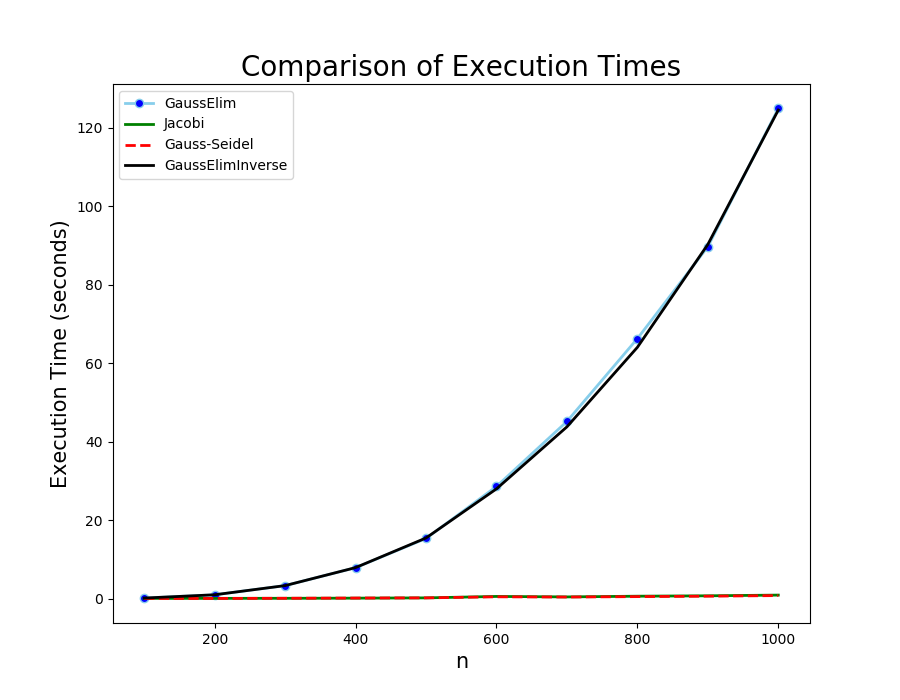

In [58]:
%matplotlib notebook

df=pd.DataFrame({'n': iterations, 'GaussElim': gauss_elim_execution, 
                 'Jacobi': jacobi_execution, 
                 'Gauss-Seidel': gauss_seidel_execution,
                'GaussElimInverse': gauss_elim_inverse_execution})

plt.plot( 'n', 'GaussElim', data=df, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=2)
plt.plot( 'n', 'Jacobi', data=df, marker='', color='green', linewidth=2)
plt.plot( 'n', 'Gauss-Seidel', data=df, marker='', color='red', linewidth=2, linestyle='dashed')
plt.plot('n', 'GaussElimInverse', data=df, marker='', color='black', linewidth=2)
plt.legend(loc='upper left', fontsize = 15)
plt.title("Comparison of Execution Times", fontsize = 20)
plt.ylabel("Execution Time (seconds)", fontsize = 15)
plt.xlabel("n", fontsize = 15)
plt.rcParams["figure.figsize"] = [9,7]
plt.legend()

As you can see, using Gaussian Elimination to obtain the inverse matrix takes almost exactly the same amount of time as using Gaussian Elimination and back substitution. Both methods take far longer than Gauss-Seidel or Jacobi iteration.